In [2]:
## tools

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [7]:
# Creating one of the tools - arxiv
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [8]:
# Creating one of the tools - wikipedia
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

In [9]:
wiki.name

'wikipedia'

In [11]:
# integrating both tools to my workflow

from dotenv import load_dotenv
load_dotenv()

import os

os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")


In [13]:
# Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [14]:
tavily.invoke("Provide me the latest AI news?")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'AI News reports on the latest artificial intelligence news and insights. Explore industry trends from the frontline of AI.',
  'score': 0.72814995},
 {'title': 'Artificial Intelligence - Latest AI News and Analysis - WSJ.com',
  'url': 'https://www.wsj.com/tech/ai',
  'content': 'The latest artificial intelligence news coverage focusing on the technology, tools and the companies building AI technology.',
  'score': 0.6917478},
 {'title': 'Latest AI news and blog posts - Google AI',
  'url': 'https://ai.google/latest-news/',
  'content': 'Tackling the most challenging problems in computer science\n\nFrontier AI\n\nBuilding the future of AI-powered products and scientific discovery\n\nFoundational ML\n\nExploring theory and application of ML in language, speech and more\n\nHealth\n\nTransforming healthcare and medicine with AI\n\nQuantum AI\n\nBuilding best-in-

In [15]:
# Combine all the 3 tools in the list
tools = [arxiv, wiki, tavily]

In [18]:
# Initialize LLM model 
from langchain_groq import ChatGroq

llm = ChatGroq( model = "qwen-qwq-32b")

In [19]:
llm.invoke("What is AI?")

AIMessage(content='\n<think>\nOkay, so I need to explain what AI is. Let me start by recalling what I know. AI stands for Artificial Intelligence. I think it\'s when machines can perform tasks that usually require human intelligence. But wait, what exactly does that mean? Maybe I should break it down into parts.\n\nFirst, the basics. AI is a branch of computer science. The goal is to create systems that can perform tasks that typically demand human intelligence. Examples might include things like recognizing speech, making decisions, solving problems, learning from data. But I should make sure I don\'t confuse AI with just any computer program. There\'s a difference between traditional software and AI. Traditional software follows predefined rules, while AI can adapt and learn from experience. Hmm, so machine learning is a subset of AI, right?\n\nI should mention different types of AI. Maybe there\'s a distinction between narrow or weak AI and general or strong AI. Narrow AI is designe

In [20]:
# binding LLM with these tools i.e LLM will have info from these tools

llm_with_tools = llm.bind_tools(tools=tools)

In [21]:
# Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_g36k', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 201, 'prompt_tokens': 356, 'total_tokens': 557, 'completion_time': 0.490973563, 'prompt_time': 0.030835558, 'queue_time': 0.25020448700000003, 'total_time': 0.521809121}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--135e859b-b89c-4200-bfb1-d8f6302e6d62-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_g36k', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 201, 'total_tokens': 557})

#### Inference: Upon invoking the LLM, it knows that this latest info needs to be looked on the net and hence calls the Tavily search (its tools) instead of hallucinating or providing the wrong info. Thus appropriate tool call is made

###### Now entire AI Assistant is ready, need to create entire application in LangGraph and the LangGraph will be doing the specific task

In [22]:
# Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yft5', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 237, 'prompt_tokens': 353, 'total_tokens': 590, 'completion_time': 0.586526555, 'prompt_time': 0.024263094, 'queue_time': 0.248169702, 'total_time': 0.610789649}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8dd6cf85-3e80-48a1-97ec-f4889d3ca90d-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': 'call_yft5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 237, 'total_tokens': 590})

## Workflow

In [ ]:
## State schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage # Human or AI message
from typing import Annotated # for labelling
from langgraph.graph.message import add_messages # reducers in langgraph (append instead of overriding the variable)

In [24]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [25]:
# Entire Chatbot with Langgraph
from IPython.display import Image,display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition # i.e when to call the tool node: if llm is calling a tool, what path to take and if not, then what path to take

In [26]:
# Defining first node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node('tool_calling_llm', tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

In [27]:
# adding edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #condition: if result(latest message) from assistant is a tool call, then tools_condition routes to tools
    # else, tools_condition routes to END
    tools_condition # default
)
builder.add_edge("tools", END)

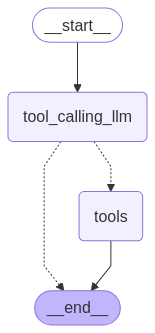

In [34]:
# compile
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [35]:

messages=graph.invoke({"messages": "1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_dbjh)
 Call ID: call_dbjh
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


#### Output inference: Human message is input, AI message is from the tool calling LLM,  Tool message gives the required output

In [ ]:
messages=graph.invoke({"messages": "Hi I am krishi. how are you?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi I am krishi. how are you?
================================== Ai Message ==================================

Hello Krishi! I'm doing well, thank you for asking! 😊 How can I assist you today?


In [ ]:
messages=graph.invoke({"messages": "Tell me some recent news on AI and also give me some papers on quantum computing"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Tell me some recent news on AI and also give me some papers on quantum computing
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_c379)
 Call ID: call_c379
  Args:
    query: latest news on AI
  arxiv (call_3s2q)
 Call ID: call_3s2q
  Args:
    query: quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI Breakthroughs and News: April- May 2025 - Crescendo.ai", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "The Fresh and Interesting Artificial Intelligence News\n\nHere are all the impactful and latest AI breakthroughs that are shaping the world around us.Â\n\nUS Tech Giants Face New Challenge as Alibaba's Qwen3 Narrows the AI Gap\n\nDate: May 5, 2025Summary: Alibabaâs latest AI model, Qwen3, sign